<a href="https://colab.research.google.com/github/akash2236/ml/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing packages
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/ML explore /Customer_Segmentation.csv')
df.head()

,Customer_ID,Age,Income,Years_as_Customer,Region,Gender,Product_Category,Purchases_Last_Year,Average_Order_Value,Customer_Segment
0,11efbb72-9f80-4e74-be38-b3f13b738cae,69.0,67288.0,10,West,Male,Clothing,4,160.929815,Low
1,535b762f-d49d-406d-8392-fa068e3dd659,40.0,85517.0,3,East,Female,Electronics,13,124.740914,Medium
2,f1b9e14e-40a5-44b0-a1bf-ea9925799c4e,27.0,NaN,1,South,Female,NaN,19,387.719169,Low
3,721ff64b-8222-434f-99fd-d735a2fcfaf7,51.0,140981.0,11,West,Female,Sports,13,326.483930,Low
4,b3cfa0f8-3e1b-4f6d-a317-3482d69da56a,NaN,43185.0,13,West,Female,Sports,27,280.359723,Medium


In [6]:
# See the no. of rows and columns
df.shape

(820, 10)

In [7]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Income', 'Years_as_Customer', 'Region', 'Gender', 'Product_Category', 'Purchases_Last_Year', 'Average_Order_Value', 'Customer_Segment']


In [8]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,float64
Income,float64
Years_as_Customer,int64
Region,object
Gender,object
Product_Category,object
Purchases_Last_Year,int64
Average_Order_Value,float64
Customer_Segment,object


In [9]:
df.describe()

,Age,Income,Years_as_Customer,Purchases_Last_Year,Average_Order_Value
count,762.000000,713.000000,820.000000,820.000000,820.000000
mean,43.228346,110214.953717,9.612195,15.346341,263.162216
std,14.942477,50595.247673,5.324704,8.491297,138.309420
min,18.000000,20121.000000,1.000000,1.000000,20.500970
25%,30.000000,68488.000000,5.000000,8.000000,141.066185
50%,44.000000,110545.000000,10.000000,16.000000,258.697148
75%,56.000000,153587.000000,14.000000,23.000000,381.980480
max,69.000000,199876.000000,19.000000,29.000000,499.718139


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          820 non-null    object 
 1   Age                  762 non-null    float64
 2   Income               713 non-null    float64
 3   Years_as_Customer    820 non-null    int64  
 4   Region               820 non-null    object 
 5   Gender               820 non-null    object 
 6   Product_Category     708 non-null    object 
 7   Purchases_Last_Year  820 non-null    int64  
 8   Average_Order_Value  820 non-null    float64
 9   Customer_Segment     820 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 64.2+ KB


In [11]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,58
Income,107
Years_as_Customer,0
Region,0
Gender,0
Product_Category,112
Purchases_Last_Year,0
Average_Order_Value,0
Customer_Segment,0


In [12]:
# Remove unwanted columns
df.drop(columns=['Product_Category'], inplace=True)  # specify the columns to remove

In [13]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [14]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [15]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Years_as_Customer,0
Region,0
Gender,0
Purchases_Last_Year,0
Average_Order_Value,0
Customer_Segment,0


In [16]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
# Scale numerical features with MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[num_columns] = scaler.fit_transform(df[num_columns])
print(df)

     Customer_ID        Age         Income  Years_as_Customer  Region  Gender  \
0             61  69.000000   67288.000000                 10       3       1   
1            269  40.000000   85517.000000                  3       0       0   
2            784  27.000000  110214.953717                  1       2       0   
3            375  51.000000  140981.000000                 11       3       0   
4            593  43.228346   43185.000000                 13       3       0   
..           ...        ...            ...                ...     ...     ...   
815          701  22.000000  101158.000000                  4       1       0   
816          584  66.000000  117106.000000                  3       2       0   
817          557  48.000000   73692.000000                  6       3       1   
818          734  37.000000  109510.000000                 10       0       1   
819          749  43.228346  124338.000000                 19       3       1   

     Purchases_Last_Year  A

In [18]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Customer_Segment', axis=1)  # -- independent variable
y = df['Customer_Segment'] # -- dependent variable

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [22]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.3719512195121951
Logistic Regression Confusion Matrix:
 [[13 20  6]
 [18 34 15]
 [17 27 14]]


In [23]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [25]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.3719512195121951
Random Forest Confusion Matrix:
 [[15 13 11]
 [21 23 23]
 [17 18 23]]


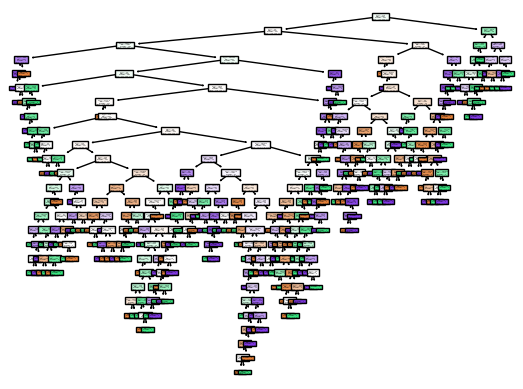

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [27]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [28]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
